# Pytorch基礎運算元件介紹 

1. Pytorch-卷積運作與參數生成
2. Pytorch 怎麼使用Pool、Activation function和宣告自己想建立的結構

## Pytorch-卷積運作與參數生成

Note: 此課程介紹的皆以2D卷積為主。

1. Conv.的參數設定<br>
2. Conv.怎麼運算<br>
3. Conv.權重如何生成<br>
4. 權重那要用哪生成方式<br>

[卷積神經網路(Convolutional neural network, CNN) — CNN運算流程](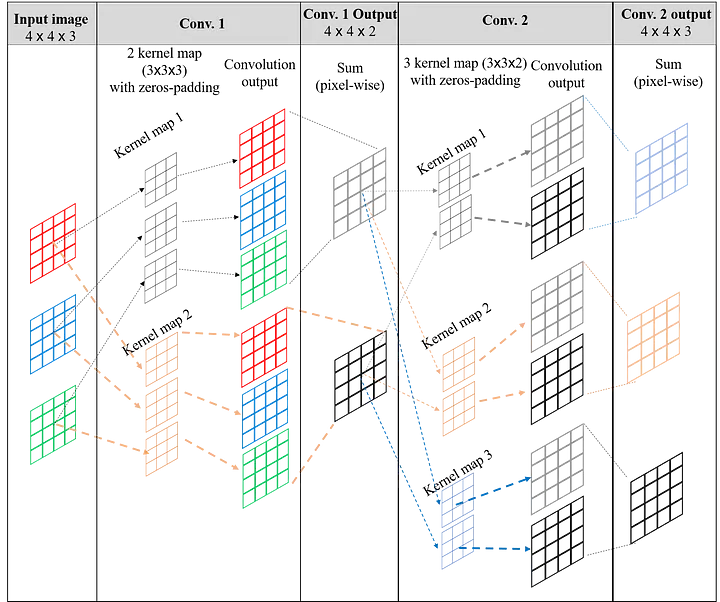)

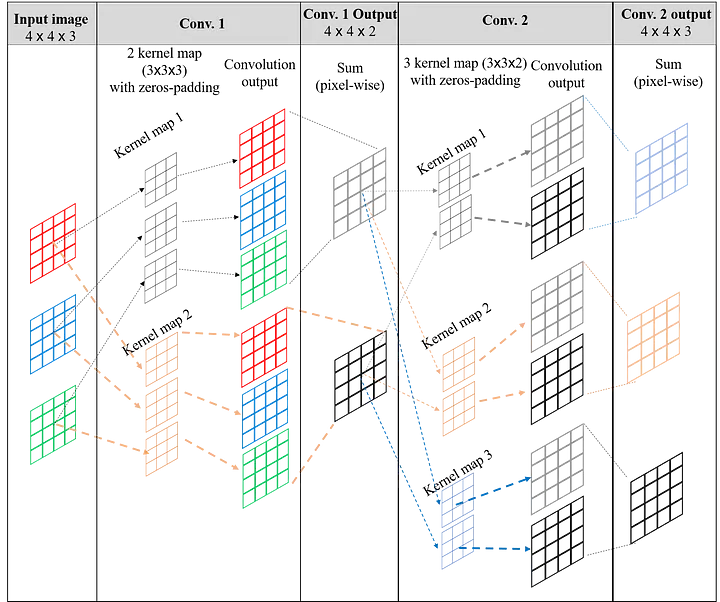

此範例為兩層的卷積，輸入為(長*寬*channel)<br>

輸入(channel=3)(2, 3, 3, 3) → Conv.1(channel=2)(3, 2, 3, 3) → Conv.2(channel=3)

conv weight => (out, in, height, width)

## Conv.的參數介紹

pytorch內[nn.Conv2D](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)的參數定義
```
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
```
>pytorch的2D Conv.要輸入的資料是$(N, C_{in}, H, W)$，輸出則是$(N, C_{out}, H_{out}, W_{out})$<br>
$N$: Batch size<br>
$C$: Channel size<br>
$H$: 特徵圖的高(單位Pixel)<br>
$W$: 特徵圖的寬(單位Pixel)<br>


參數設定的項目有<br>
1. ```in_channels```: $ C_{in}$ 輸入特徵圖的channel數。<br>
2. ```out_channels```: $ C_{out}$ 輸出特徵圖的channel數。 <br>
3. ```kernel_size```: 卷積的kernel大小。<br>
4. ```stride=1```: 步伐大小，如果為1代表kernel map步伐一次移動一個pixel，為2代表kernel map步伐一次移動兩個pixel。<br>
5. ```padding```: 輸入圖是否需要生出額外的邊(元素皆為0)。<br>
6. ```dilation```: atrous convolution空洞卷積設定。<br>
7. ```groups```: Group convolution設定，將輸入和輸出的channel進行分組，```in_channels```和```out_channels```必須要能被```groups```整除。且當in_channels=out_channels=groups就是depthwise Conv.<br> 
8. ```bias```: 輸出的channel需要bias嗎? True(default) or False。<br> 



## 權重矩陣創建 torch.nn.Conv2d - kernel size

### 範例1 : bias有沒有設定的差異

| Example   | # input channel | # output channel | kernel size | bias   |
| :-----:   | :----:          | :----:           |   :----:     | :----: | 
| Example 1 |  1              |  2               |   3          |  1     |
| Example 2 |  1              |  2               |   3          |  0     |

In [1]:
# input channel = 1
# output channel = 2
# kernel size = 3
# stride = 1
# bias = True

import torch
import torch.nn as nn
import numpy as np

conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3,stride=1, bias=True)

print('- Weight of conv layer:\n\t{}'.format(conv.weight))

print('- Weight(shape) of conv layer:{}'.format(conv.weight.shape))

print('+ Bias of conv layer:\n\t{}'.format(conv.bias))

print('+ Bias(shape) of conv layer:{}'.format(conv.bias.shape))



- Weight of conv layer:
	Parameter containing:
tensor([[[[ 0.1275,  0.2183, -0.2024],
          [ 0.1209,  0.1785, -0.2709],
          [ 0.2189,  0.1627,  0.2158]]],


        [[[-0.0296, -0.0560,  0.1785],
          [-0.0340, -0.1127, -0.2546],
          [-0.0736, -0.2669,  0.1556]]]], requires_grad=True)
- Weight(shape) of conv layer:torch.Size([2, 1, 3, 3])
+ Bias of conv layer:
	Parameter containing:
tensor([0.1587, 0.2308], requires_grad=True)
+ Bias(shape) of conv layer:torch.Size([2])


In [2]:
# input channel = 1
# output channel = 2
# kernel size = 3
# stride = 1
# bias = False

conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, stride=1, bias=False)

print('- Weight of conv layer:\n\t{}'.format(conv.weight))

print('- Weight(shape) of conv layer:{}'.format(conv.weight.shape))

print('+ Bias of conv layer:\n\t{}'.format(conv.bias))



- Weight of conv layer:
	Parameter containing:
tensor([[[[ 0.3253,  0.0458,  0.2863],
          [ 0.1044, -0.2523, -0.0161],
          [-0.3209,  0.3107, -0.0632]]],


        [[[ 0.0656, -0.1833,  0.2367],
          [ 0.0575,  0.0035,  0.1025],
          [-0.3146, -0.0260,  0.2227]]]], requires_grad=True)
- Weight(shape) of conv layer:torch.Size([2, 1, 3, 3])
+ Bias of conv layer:
	None


### 範例2: Input channel和output channel都增加

| Example   | # input channel | # output channel | kernel sizse | bias   |
| :-----:   | :----:          | :----:           |   :----:     | :----: | 
| Example 1 |  2              |  2               |   3          |  0     |
| Example 2 |  2              |  3               |   3          |  0     |

In [3]:
# input channel = 2
# output channel = 2
# kernel size = 3
# stride = 1
# bias = False

conv = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, stride=1, bias=False)
print('- Weight of conv layer:\n\t{}'.format(conv.weight))
print('- Weight(shape) of conv layer:{}'.format(conv.weight.shape))
print('+ Bias of conv layer:\n\t{}'.format(conv.bias))



- Weight of conv layer:
	Parameter containing:
tensor([[[[ 1.6702e-01,  4.9357e-02,  3.9207e-02],
          [ 2.4904e-02,  3.7387e-03, -1.9863e-01],
          [ 2.5095e-02, -1.6522e-02,  1.1492e-01]],

         [[ 1.3835e-01, -1.7295e-01,  2.2577e-01],
          [-2.4433e-02, -7.5737e-02, -1.0149e-04],
          [ 1.4286e-01, -1.3312e-01,  4.6046e-02]]],


        [[[-3.7317e-02,  1.6523e-01, -2.0005e-01],
          [ 1.6949e-01, -1.1386e-03,  1.5840e-03],
          [-1.5095e-02,  1.6933e-01,  1.6986e-02]],

         [[-1.8329e-01, -1.9798e-01,  1.0176e-01],
          [ 8.0559e-02,  1.6857e-01,  4.9277e-02],
          [ 3.0306e-02,  2.5065e-02, -1.6924e-01]]]], requires_grad=True)
- Weight(shape) of conv layer:torch.Size([2, 2, 3, 3])
+ Bias of conv layer:
	None


In [4]:
# input channel = 2
# output channel = 3
# kernel size = 3
# stride = 1
# bias = False


conv = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=3, stride=1, bias=False)
print('- Weight of conv layer:\n\t{}'.format(conv.weight))
print('- Weight(shape) of conv layer:{}'.format(conv.weight.shape))



- Weight of conv layer:
	Parameter containing:
tensor([[[[ 5.9562e-02,  1.3845e-01,  1.4078e-01],
          [ 2.1272e-01,  8.4105e-02,  9.1696e-02],
          [ 1.2636e-01,  2.0490e-01, -1.5317e-04]],

         [[-5.9771e-02,  1.8677e-01, -1.5327e-02],
          [-1.8890e-01,  2.3326e-01,  5.3273e-02],
          [ 2.3313e-01, -1.9902e-01,  2.0030e-01]]],


        [[[ 1.5667e-01, -5.5016e-02,  4.1838e-02],
          [-2.7293e-02, -1.3641e-01,  8.9892e-02],
          [-9.3183e-02,  1.7103e-01, -1.2425e-01]],

         [[-3.4018e-02,  2.2283e-01,  1.0010e-01],
          [-6.6427e-02,  1.7062e-01, -1.5751e-01],
          [ 3.8240e-02,  1.9358e-01,  1.7369e-01]]],


        [[[-1.6696e-01, -8.3789e-02, -1.1308e-01],
          [-2.0359e-01,  1.5500e-01,  9.3125e-02],
          [-1.5212e-01,  1.6743e-01, -8.7426e-02]],

         [[ 9.7755e-02, -1.3714e-01,  1.3135e-01],
          [ 1.4750e-01,  2.1916e-01, -7.7583e-02],
          [-1.4515e-01,  6.7991e-02, -8.0872e-02]]]], requires_grad=True

### 範例3: 非正方形的 kernel size

In [5]:
conv = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=(3,1), stride=1, bias=False)
print(conv.weight)   
print(conv.weight.shape)
conv = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=(3,2), stride=1, bias=False)
print(conv.weight.shape)



Parameter containing:
tensor([[[[-0.1421],
          [ 0.0350],
          [-0.3924]],

         [[-0.2059],
          [ 0.2174],
          [-0.3643]]],


        [[[-0.2158],
          [-0.2894],
          [ 0.0295]],

         [[ 0.3444],
          [ 0.2890],
          [ 0.0392]]],


        [[[ 0.1038],
          [ 0.4010],
          [-0.0053]],

         [[-0.0445],
          [ 0.3444],
          [-0.0794]]]], requires_grad=True)
torch.Size([3, 2, 3, 1])
torch.Size([3, 2, 3, 2])


## 自定義權重

note: 
    剛剛我們用conv.weight可以看到權重值，所以看的到就能指定值進去。<br>
    但不是直接塞到conv.weight，因為是class參數(torch.nn.parameter.Parameter)，不是torch.tensor<br>
    因此需塞到的位置是conv.weight.data (屬性為torch.tensor)<br>
    同樣要改bias，也是去改conv.同樣要改bias.data<br>

In [6]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1)

print(f'weight of conv layer:\n{conv.weight}')

print(f'bias of conv layer:\n{conv.bias}')


weight of conv layer:
Parameter containing:
tensor([[[[-0.1658, -0.1008, -0.3075],
          [ 0.2371, -0.1532,  0.3086],
          [-0.3292,  0.1959, -0.2596]]]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([0.0635], requires_grad=True)


In [7]:
replace_weight = torch.tensor([[0,0,0],
                               [1,2,3],
                               [4,5,6]], dtype=torch.float32)
replace_bias = torch.tensor([10000000000000], dtype=torch.float32)

conv.weight.data=replace_weight
conv.bias.data=replace_bias

print(f'weight of conv layer:\n{conv.weight}')
print(f'bias of conv layer:\n{conv.bias}')



weight of conv layer:
Parameter containing:
tensor([[0., 0., 0.],
        [1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([1.0000e+13], requires_grad=True)


### 權重歸 0 ( initial weight and bias as 0 )

In [8]:
conv.weight.data.zero_()
conv.bias.data.zero_()
print(f'weight of conv layer:\n{conv.weight}')
print(f'bias of conv layer:\n{conv.bias}')


weight of conv layer:
Parameter containing:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([0.], requires_grad=True)


### 權重填充

In [9]:
conv.weight.data.fill_(1)
conv.bias.data.fill_(1)
print('*'*50)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

######################################

conv.weight.data.fill_(0)
conv.bias.data.fill_(0)
print('*'*50)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

######################################

conv.weight.data.fill_(200)
conv.bias.data.fill_(10)
print('*'*50)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))



**************************************************
weight of conv layer:
Parameter containing:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([1.], requires_grad=True)
**************************************************
weight of conv layer:
Parameter containing:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([0.], requires_grad=True)
**************************************************
weight of conv layer:
Parameter containing:
tensor([[200., 200., 200.],
        [200., 200., 200.],
        [200., 200., 200.]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([10.], requires_grad=True)


## 權重初始化

利用內建函數將Conv.權重指定為某種/特定分布<br>

預設是權重初始值是從均勻分布生成`

(array([19., 27., 16., 23., 15., 17., 26., 19., 25., 18., 24., 18., 22.,
        20., 21., 26., 20., 30., 18., 22., 20., 21., 20., 28., 22., 21.,
        23., 18., 20., 16., 23., 10., 12., 23., 13., 21., 12., 18., 14.,
        18., 18., 25., 13., 20., 20., 12., 18., 21., 24., 30.]),
 array([-3.14716771e-02, -3.02110445e-02, -2.89504137e-02, -2.76897810e-02,
        -2.64291503e-02, -2.51685176e-02, -2.39078868e-02, -2.26472542e-02,
        -2.13866234e-02, -2.01259907e-02, -1.88653581e-02, -1.76047273e-02,
        -1.63440946e-02, -1.50834629e-02, -1.38228312e-02, -1.25621995e-02,
        -1.13015678e-02, -1.00409361e-02, -8.78030434e-03, -7.51967216e-03,
        -6.25904044e-03, -4.99840872e-03, -3.73777677e-03, -2.47714506e-03,
        -1.21651322e-03,  4.41186130e-05,  1.30475045e-03,  2.56538228e-03,
         3.82601400e-03,  5.08664595e-03,  6.34727767e-03,  7.60790939e-03,
         8.86854157e-03,  1.01291733e-02,  1.13898050e-02,  1.26504367e-02,
         1.39110684e-02,  1.5171

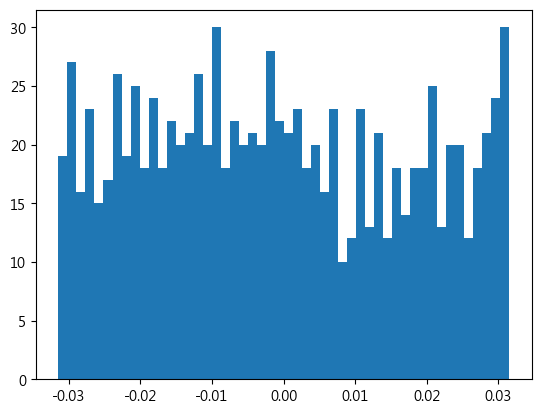

In [10]:
import matplotlib.pyplot as plt

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
data = conv.weight.data

plt.hist(np.squeeze(data.numpy()),50)


### 權重常態分布(Normal Distribution) $N(0,1)$

In [12]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3), stride=1)

print('weight of conv layer:\n{}'.format(conv.weight))
print('*'*50)

conv.weight.data.normal_(0,1)

print('weight of conv layer:\n{}'.format(conv.weight))



weight of conv layer:
Parameter containing:
tensor([[[[-0.2078, -0.3261,  0.1349],
          [-0.2234,  0.3267,  0.0673],
          [-0.0137, -0.1234,  0.3048]]]], requires_grad=True)
**************************************************
weight of conv layer:
Parameter containing:
tensor([[[[-0.7452,  0.2800, -1.1311],
          [-0.7889, -1.5026,  1.1204],
          [ 0.8584, -0.2270,  0.9839]]]], requires_grad=True)


(array([ 1.,  0.,  0.,  3.,  7., 11., 10.,  8., 11., 15., 28., 16., 14.,
        26., 33., 31., 45., 35., 41., 55., 57., 33., 54., 56., 41., 55.,
        42., 49., 29., 31., 30., 26., 24., 14., 13., 13.,  8.,  9.,  5.,
         2.,  5.,  6.,  1.,  1.,  1.,  1.,  1.,  2.,  0.,  1.]),
 array([-2.82696509, -2.69942904, -2.57189298, -2.44435692, -2.31682086,
        -2.1892848 , -2.06174874, -1.9342128 , -1.80667675, -1.67914069,
        -1.55160463, -1.42406857, -1.29653251, -1.16899645, -1.04146039,
        -0.91392434, -0.78638834, -0.65885228, -0.53131622, -0.40378016,
        -0.2762441 , -0.14870806, -0.02117202,  0.10636403,  0.23390009,
         0.36143613,  0.48897219,  0.61650825,  0.7440443 ,  0.8715803 ,
         0.99911636,  1.12665248,  1.25418842,  1.38172448,  1.50926054,
         1.63679659,  1.76433265,  1.89186871,  2.01940465,  2.14694071,
         2.27447677,  2.40201283,  2.52954888,  2.65708494,  2.784621  ,
         2.91215706,  3.03969312,  3.16722918,  3.29476523,

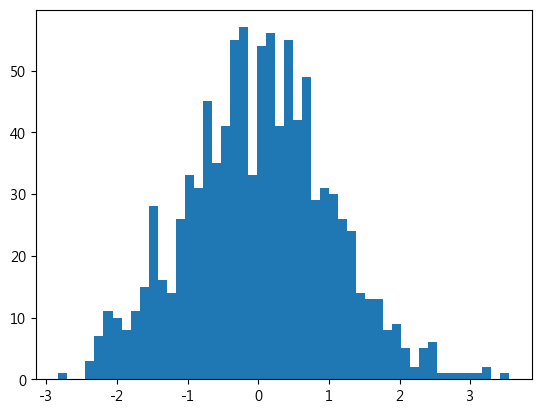

In [16]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
conv.weight.data.normal_(0,1)

data = conv.weight.data
data = data.numpy()
data = np.squeeze(data)

plt.hist(data,50)

## 特殊權重

<font  size=4>
- 1. 原廠設定 default  <br>
- 2. Xavier系列: Xavier均匀分布、Xavier常態分布 <br>
- 3. kaiming系列: kaiming均匀分布、kaiming常態分布 <br>
- 4. 自行定義權重

>Note:<br>
    - 參數初始化可以見torch.nn.init。 <br>
    - 均勻分布 = uniform distribution <br>
    - 常態分布 = normal distribution <br>
    參考資料[深度學習: Weight initialization和Batch Normalization](https://chih-sheng-huang821.medium.com/%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-weight-initialization%E5%92%8Cbatch-normalization-f264c4be37f5)
    </font>

In [18]:
# 定義權重直條圖函數

def histforConv(conv):
    data = conv.weight.data
    data = torch.flatten(data)
    plt.hist(np.squeeze(data.numpy()),50)
    plt.show()


### Default <br>

原廠設定為均勻分布

$$U(-stdv, stdv)$$

stdv為
$$
stdv = \frac{1}{\sqrt{x}},  x=(Input channel個數*kernel size)
$$



以下範例: 
conv = nn.Conv2d(in_channels=10, out_channels=30, kernel_size=(10,10), stride=1) # 30,10,10,10

$$
stdv = \frac{1}{\sqrt{x}} = \frac{1}{\sqrt{10\times10\times10}} = 0.0316228
$$

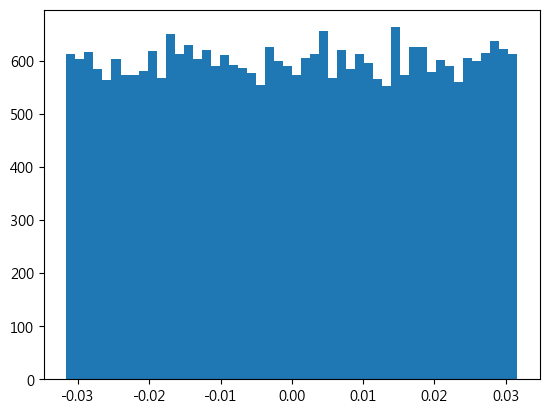

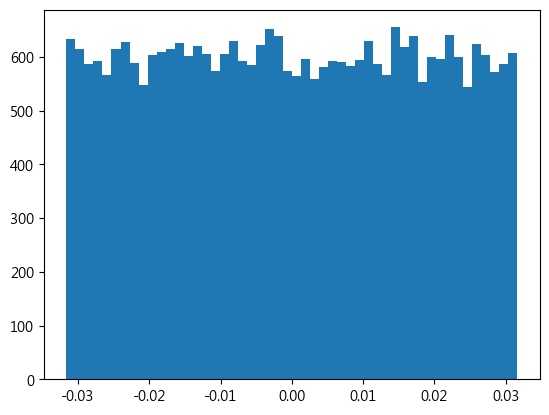

In [19]:
import math
conv = nn.Conv2d(in_channels=10, out_channels=30, kernel_size=(10,10), stride=1) # 30,10,10,10
histforConv(conv)


stdv = 1. / math.sqrt(conv.weight.size(1)*conv.weight.size(2)*conv.weight.size(3))
conv.weight.data.uniform_(-stdv, stdv)
histforConv(conv)




### Xavier系列: Xavier均匀分布、Xavier常態分布

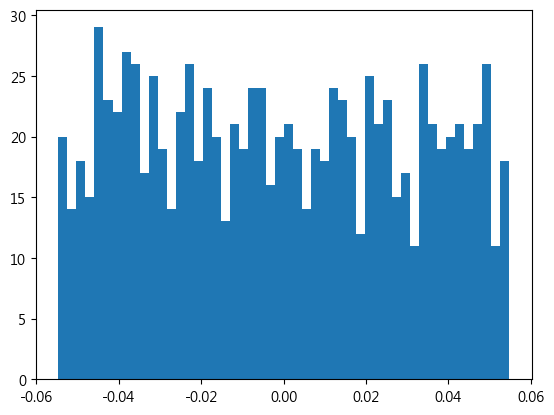

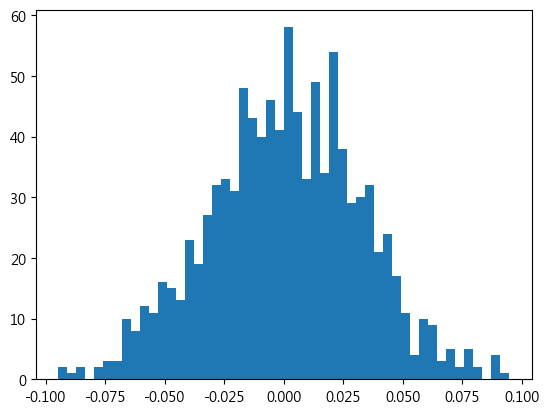

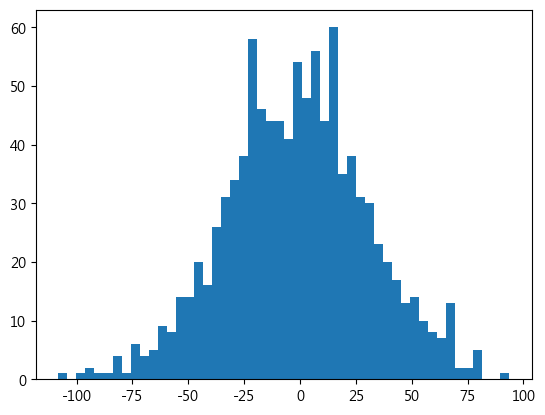

In [21]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
nn.init.xavier_uniform_(conv.weight)
histforConv(conv)

nn.init.xavier_normal_(conv.weight)
histforConv(conv)

nn.init.xavier_normal_(conv.weight, gain=1000)
histforConv(conv)

### kaiming系列: kaiming均匀分布、kaiming常態分布 <br>

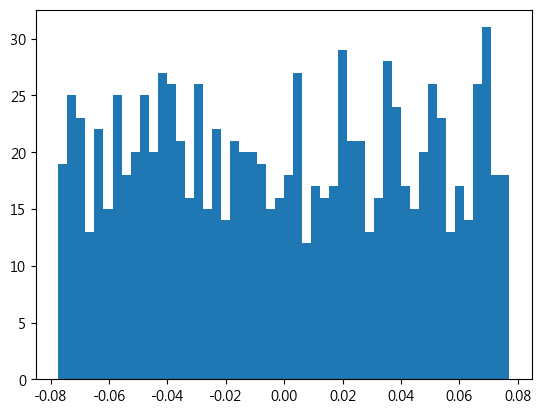

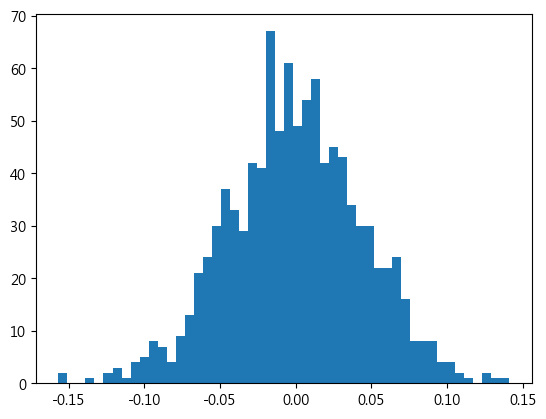

In [22]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
nn.init.kaiming_uniform_(conv.weight)
histforConv(conv)

nn.init.kaiming_normal_(conv.weight)
histforConv(conv)



## 自行定義權重

Reference: [TORCH.NN.INIT](https://pytorch.org/docs/stable/nn.init.html?highlight=nn%20init%20sparse_#torch.nn.init.sparse_)

----------------
### 1. 均勻分布，參數服從均勻分布a到b之間: <br>

$$
U(a,b)
$$

<code>torch.nn.init.uniform_(tensor, a=0, b=1)</code>




In [ ]:
# 1. 均勻分布，參數服從均勻分布a到b之間
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)

nn.init.uniform_(conv.weight,a=100, b=200)

histforConv(conv)



### 2. 常態分布，參數服從常態分布，default為平均數0 標準差1: <br>

$$
N(mean,std)
$$


<code>torch.nn.init.normal_(tensor, mean=0, std=1)</code>  



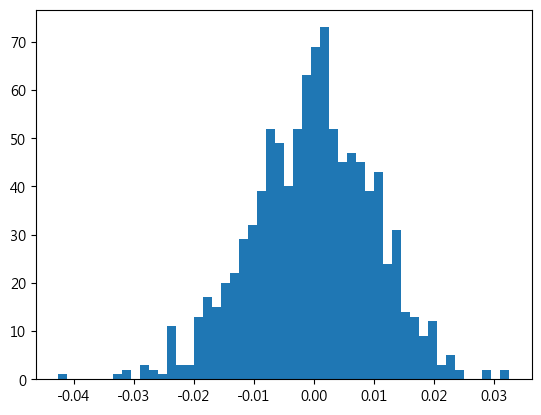

In [24]:
# 2. 常態分布，參數服從常態分布，default為平均數0 標準差1
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)

nn.init.normal_(conv.weight,mean=0, std=0.01)

histforConv(conv)


### 3. 常數化權重矩陣 <br>
<code>torch.nn.init.constant_(tensor, val)</code>



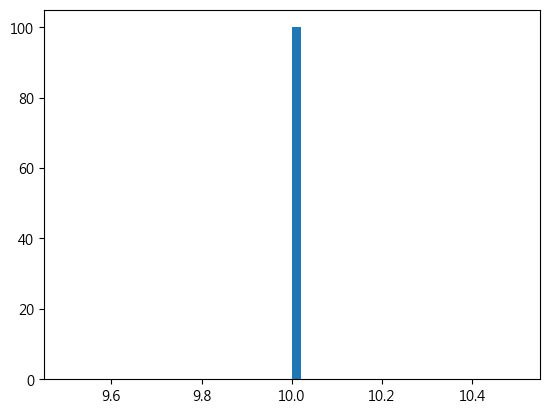

In [28]:
# 3. 設定為常數
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(100,1), stride=1)

nn.init.constant_(conv.weight,val=10)

histforConv(conv)

### 4. 單位化權重矩陣 <br>
<code>torch.nn.init.eye_(tensor)</code>



weight of conv layer:
Parameter containing:
tensor([[[[1., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 1.]]]], requires_grad=True)


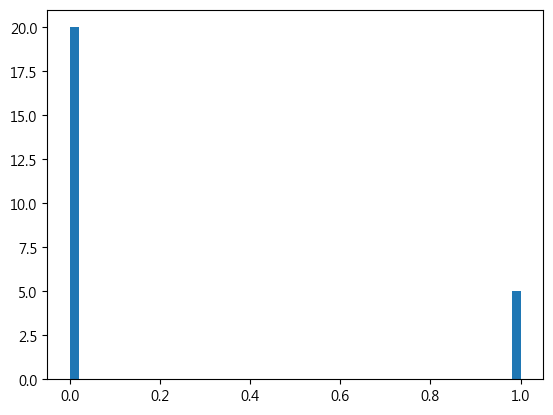

In [26]:
# 4. 單位化矩陣設定
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(5,5), stride=1)
nn.init.eye_(conv.weight.data[0,0,:,:])
print('weight of conv layer:\n{}'.format(conv.weight))

histforConv(conv)

### 5. 正交權重矩陣 <br>
讓生成的權重之間會正交。（必須至少是2維的，對於更高維度的張量，超出的維度會被展平，視作行等於第一個維度。<br>
<code>torch.nn.init.orthogonal_(tensor, gain=1)</code>



In [32]:
conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=(2,1), stride=1)
nn.init.orthogonal_(conv.weight)
# print('weight of conv layer:\n{}'.format(conv.weight))

data = conv.weight.data
print(data.shape)

data = data.numpy()[:,0,:,0]

print('weight of conv layer:\n{}'.format(conv.weight))
print('weight of conv layer w/ transpose :\n{}'.format(np.transpose(data)))

print('dot product :\n{}'.format(np.dot(data,np.transpose(data))))

torch.Size([2, 1, 2, 1])
weight of conv layer:
Parameter containing:
tensor([[[[-0.9959],
          [ 0.0905]]],


        [[[-0.0905],
          [-0.9959]]]], requires_grad=True)
weight of conv layer w/ transpose :
[[-0.9958999  -0.09046274]
 [ 0.09046274 -0.99589986]]
dot product :
[[1.0000001e+00 5.4665357e-09]
 [5.4665357e-09 1.0000000e+00]]


### 6. sparsity 稀疏權重矩陣 <br>
讓參數生成的時候會稀疏化。
參數sparsity設定為每一列要設定為0的比例。<br>
其他非0的參數生成採用$N(0, std)$，預設std=0.01。<br>
<code>torch.nn.init.sparse_(tensor, sparsity, std=0.01)</code>

In [ ]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(5,5), stride=1)
nn.init.sparse_(conv.weight.data[0,0,:,:], sparsity=0.3, std=10)
print('weight of conv layer:\n{}'.format(conv.weight))



## Pool function


<font size=4> 
   
   1. Pool example <br><br>
   2. Activation example: <br><br>

</font>

### Pooling example
<font size=3>
- 1. Max-pooling: ks=2, stride=2<br>
- 2. Average pooling : ks=2, stride=2<br>
- 3. Global Average Pooling (GAP)<br>
</font>

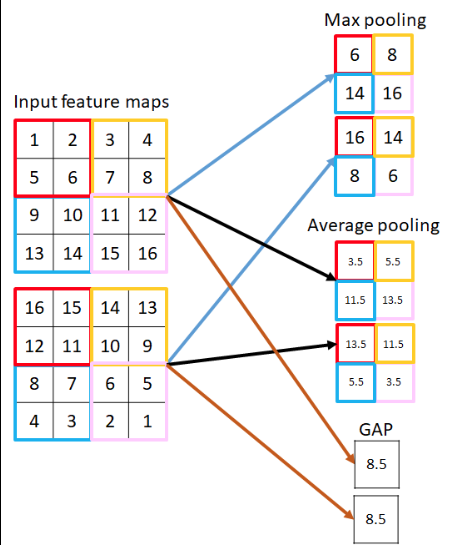

In [2]:
import torch
import torch.nn as nn
import numpy as np

InputImage = torch.FloatTensor([
                                [[ 1, 2, 3, 4],
                                 [ 5, 6, 7, 8],
                                 [ 9,10,11,12],
                                 [13,14,15,16]],
                                [[16,15,14,13],
                                 [12,11,10, 9],
                                 [ 8, 7, 6, 5],
                                 [ 4, 3, 2, 1]]
                                ]).unsqueeze(axis=0) # 1*2*4*4


InputImage

tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]],

         [[16., 15., 14., 13.],
          [12., 11., 10.,  9.],
          [ 8.,  7.,  6.,  5.],
          [ 4.,  3.,  2.,  1.]]]])

### maxpool

In [3]:
maxpool = nn.MaxPool2d(kernel_size=2, stride=2) # 
print('Input feature map:\n{}'.format(InputImage))
output = maxpool(InputImage)
print('\nOutput feature map after max pooling:\n{}'.format(output))



Input feature map:
tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]],

         [[16., 15., 14., 13.],
          [12., 11., 10.,  9.],
          [ 8.,  7.,  6.,  5.],
          [ 4.,  3.,  2.,  1.]]]])

Output feature map after max pooling:
tensor([[[[ 6.,  8.],
          [14., 16.]],

         [[16., 14.],
          [ 8.,  6.]]]])


### avgpool

In [9]:
InputImage

tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]],

         [[16., 15., 14., 13.],
          [12., 11., 10.,  9.],
          [ 8.,  7.,  6.,  5.],
          [ 4.,  3.,  2.,  1.]]]])

In [7]:
avgpool = nn.AvgPool2d(kernel_size=2, stride=2)

output = avgpool(InputImage)
print('\nOutput feature map after avg pooling:\n{}'.format(output))



Output feature map after avg pooling:
tensor([[[[ 3.5000,  5.5000],
          [11.5000, 13.5000]],

         [[13.5000, 11.5000],
          [ 5.5000,  3.5000]]]])


### GAP

In [5]:
output = nn.functional.adaptive_avg_pool2d(InputImage, 1).reshape(InputImage.shape[0], -1)
print('\nOutput feature map after GAP:\n{}'.format(output))
print(output.shape)



Output feature map after GAP:
tensor([[8.5000, 8.5000]])
torch.Size([1, 2])


## Softmax Function

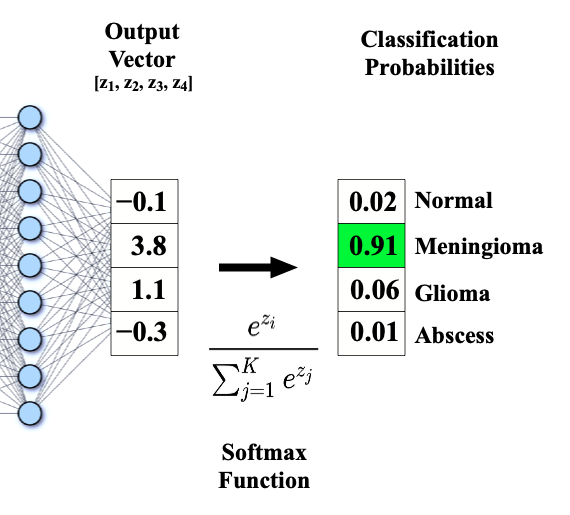

### case 1 模型輸出為-1和1

In [10]:
import numpy as np
logits = np.array([-1,1])
probability = np.exp(logits)/np.sum(np.exp(logits))

print('模型輸出為{}'.format(logits))
print('Softmax後模型輸出為{}'.format(probability))

模型輸出為[-1  1]
Softmax後模型輸出為[0.11920292 0.88079708]


### case 2 模型輸出為-10、0、1、20

In [11]:
import torch
# numpy
logits = np.array([-10,0,1,10])
probability1 = np.exp(logits)/np.sum(np.exp(logits))

print('模型輸出為:{}\n'.format(logits))
print('numpy Softmax後模型輸出為:{}\n'.format(probability1))

# pytorch
logits = torch.FloatTensor(logits)
probability2 = torch.nn.Softmax(dim=0)(logits)
print('pytorch Softmax後模型輸出為:{}\n'.format(probability2.numpy()))

# 兩者差異
print('兩者差:{}\n'.format(probability1-probability2.numpy()))

模型輸出為:[-10   0   1  10]

numpy Softmax後模型輸出為:[2.06080573e-09 4.53922670e-05 1.23388975e-04 9.99831217e-01]

pytorch Softmax後模型輸出為:[2.0608057e-09 4.5392266e-05 1.2338896e-04 9.9983120e-01]

兩者差:[-1.41484037e-17  1.26534279e-12  1.11701495e-11  1.70516135e-08]

